#Sentiment Analysis Twitter with [snscrape] and [vader]

Referensi :

*   https://www.youtube.com/watch?v=jtIMnmbnOFo
*   https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d


## Install Modules and Import Library

In [ ]:
!pip install textblob
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

# data scraping
import snscrape.modules.twitter as sntwitter

# sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

# chart
import matplotlib.pyplot as plt

# data cleaning
import re
import string

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Data Scraping

Library = `snscrape`

data scraping twitter menurut search keyword \
Time Range = 1 Januari 2022 - 20 April 2022 \
Keyword =
*   ui ux
*   android develop

Hasil data scraping akan disimpan di runtime ini

Karena proses run lama, gapapa kalo section ini gausah di run lagi. Langsung import dataset hasil scraping di section bawahnya


# **Android Dev**

In [ ]:
# Scraping android
# Jangan di run lagi, soalnya lumayan lama. dataset hasil scraping dah ku save bentuk csv. nanti tinggal pake csv itu buat sentiment analysis

query = "android dev lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_androidDev.csv')

## Sentiment Keyword = android dev

### Import Dataset

In [ ]:
#import dataset android Dev
url='https://drive.google.com/file/d/1sKYvWkFqCjscmVVI5LIf2bsl3ME9NiuW/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "android dev lang:id since:2022-01-01"

androidDev = pd.read_csv(file_name)
androidDev.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-04-17 16:25:21+00:00,bayuprathama_,@worksfess Kalo fullstack web dev boleh lah ma...
1,1,2022-04-17 06:45:01+00:00,DioptriCahyo,@lahkokkeos wkwkwkkw ini 1 orang udh bisa biki...
2,2,2022-04-17 03:30:09+00:00,zazal_ghiffari,Rona Merah\n@Android \n@AndroidDev \n#mobilede...
3,3,2022-04-15 05:36:31+00:00,HeniPR,"Kalian kenal coding pertama apa?\nKalau aku, H..."
4,4,2022-04-14 04:32:24+00:00,ofKJIGF,"@worksfess Android dev, kayaknya web dev udh b..."


In [ ]:
androidDev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  136 non-null    int64 
 1   Date        136 non-null    object
 2   User        136 non-null    object
 3   Tweet       136 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.4+ KB


### Data Preprocessing

*   Menghapus Row yang Null
*   menghapus Row yang sama (duplicate row)
*   Memfilter Retweet, tag, dan link
*   Mengubah Tweet ke dalam bentuk lowercase
*   Menghapus Kolom yang tidak digunakan



In [ ]:
tw_list = androidDev

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text
0,0,2022-04-17 16:25:21+00:00,bayuprathama_,kalo fullstack web dev boleh lah masih bisa. ...,@worksfess Kalo fullstack web dev boleh lah ma...
1,1,2022-04-17 06:45:01+00:00,DioptriCahyo,wkwkwkkw ini 1 orang udh bisa bikin firma mar...,@lahkokkeos wkwkwkkw ini 1 orang udh bisa biki...
2,2,2022-04-17 03:30:09+00:00,zazal_ghiffari,rona merah\n \n \n#mobiledev,Rona Merah\n@Android \n@AndroidDev \n#mobilede...
3,3,2022-04-15 05:36:31+00:00,HeniPR,"kalian kenal coding pertama apa?\nkalau aku, h...","Kalian kenal coding pertama apa?\nKalau aku, H..."
4,4,2022-04-14 04:32:24+00:00,ofKJIGF,"android dev, kayaknya web dev udh byk bgt ga ...","@worksfess Android dev, kayaknya web dev udh b..."


Note :

[Tweet] = Hasil Filter \
[text] = Raw Tweet

In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

### Sentiment Analysis

Library = vader

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0

# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
tw_list.head(10)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-17 16:25:21+00:00,bayuprathama_,kalo fullstack web dev boleh lah masih bisa. ...,0.00,0.00,positive,0.0,0.947,0.053,0.2023
1,2022-04-17 06:45:01+00:00,DioptriCahyo,wkwkwkkw ini 1 orang udh bisa bikin firma mar...,0.00,0.00,neutral,0.0,1.000,0.000,0.0000
2,2022-04-17 03:30:09+00:00,zazal_ghiffari,rona merah\n \n \n#mobiledev,0.00,0.00,neutral,0.0,1.000,0.000,0.0000
3,2022-04-15 05:36:31+00:00,HeniPR,"kalian kenal coding pertama apa?\nkalau aku, h...",0.00,0.00,positive,0.0,0.959,0.041,0.2023
4,2022-04-14 04:32:24+00:00,ofKJIGF,"android dev, kayaknya web dev udh byk bgt ga ...",0.00,0.00,neutral,0.0,1.000,0.000,0.0000
5,2022-04-12 12:31:39+00:00,androiddevfeed,api for military news #android #androiddev,-0.10,0.10,neutral,0.0,1.000,0.000,0.0000
6,2022-04-09 12:46:46+00:00,madao_la,"pertanyaan paling mendasar dulu, kamu suka ng...",0.00,0.00,neutral,0.0,1.000,0.000,0.0000
7,2022-04-09 02:31:51+00:00,codingfess,code; kak kalo jadi flutter dev tapi gapunya m...,0.00,0.00,neutral,0.0,1.000,0.000,0.0000
8,2022-04-08 22:23:29+00:00,zgve679jdv,tergantung path. kalo web dev ga butuh spek t...,0.16,0.54,neutral,0.0,1.000,0.000,0.0000
9,2022-04-08 16:33:21+00:00,_doubledy,tuh cari android dev @dlann__,0.00,0.00,neutral,0.0,1.000,0.000,0.0000


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-17 16:25:21+00:00,bayuprathama_,kalo fullstack web dev boleh lah masih bisa. ...,0.0,0.0,positive,0.0,0.947,0.053,0.2023
3,2022-04-15 05:36:31+00:00,HeniPR,"kalian kenal coding pertama apa?\nkalau aku, h...",0.0,0.0,positive,0.0,0.959,0.041,0.2023
12,2022-04-08 05:24:30+00:00,PottoPotato,brand power mungkin ya.. kek instahram misaln...,0.0,0.0,positive,0.0,0.935,0.065,0.4588


In [ ]:
tw_list_negative.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
36,2022-03-25 09:36:33+00:00,arieftb22,saya mantau dulu deh.. udh keduluan senior yg ...,0.0,0.5,negative,0.072,0.928,0.0,-0.3400
41,2022-03-24 05:56:51+00:00,awlyasmara,padahal udah masuk android dev yaaallah🥲 pake ...,0.0,0.0,negative,0.231,0.769,0.0,-0.4019
63,2022-03-06 07:04:16+00:00,frstsbgt,trus ada lagi nih yg android dev. dulu pas gw ...,0.0,0.0,negative,0.053,0.947,0.0,-0.4019


In [ ]:
tw_list_neutral.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
1,2022-04-17 06:45:01+00:00,DioptriCahyo,wkwkwkkw ini 1 orang udh bisa bikin firma mar...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,2022-04-17 03:30:09+00:00,zazal_ghiffari,rona merah\n \n \n#mobiledev,0.0,0.0,neutral,0.0,1.0,0.0,0.0
4,2022-04-14 04:32:24+00:00,ofKJIGF,"android dev, kayaknya web dev udh byk bgt ga ...",0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
negative,8,5.88
positive,24,17.65
neutral,104,76.47


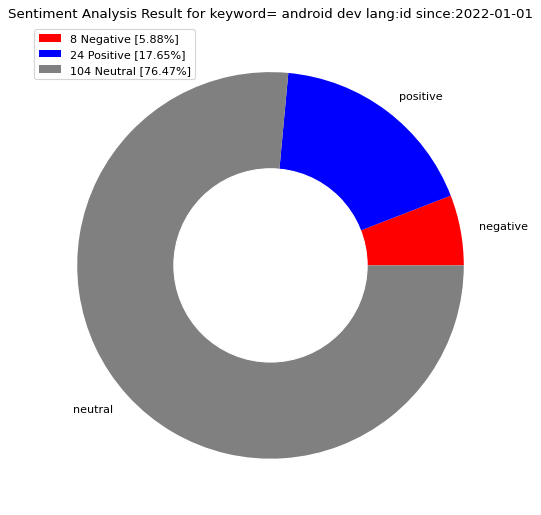

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart
positive = pc['Percentage']['positive']
neutral = pc['Percentage']['neutral']
negative = pc['Percentage']['negative']
pos = pc['Total']['positive']
neu = pc['Total']['neutral']
neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [str(neg)+' Negative ['+str(negative)+'%]',
          str(pos)+' Positive ['+str(positive)+'%]' ,
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['red','blue','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()

# **Kursus android**

In [ ]:
query = "kursus android lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_kursusandroid.csv')

In [ ]:
url='https://drive.google.com/file/d/18LseodpOG6dd-m2k9Y9dHX4SRKS_wf2-/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "kursus android lang:id since:2022-01-01"

kursusAndroid = pd.read_csv(file_name)
kursusAndroid.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-04-10 13:11:02+00:00,kurapikawifee,Ingin bergabung dengan saya? Cukup daftar ke k...
1,1,2022-03-30 04:13:48+00:00,rinmansor,Tapi pakai Chromebook ada pain points dia juga...
2,2,2022-03-29 03:16:45+00:00,cik_apung,@onnowpurbo Pak mohon saran dimana ya kursus o...
3,3,2022-02-05 02:08:26+00:00,FlashcomID,Taukah Anda bidang android programming apa saj...
4,4,2022-02-02 22:26:53+00:00,EffendiSapei,@Oshiiiiiinnn_50 Sy dari kecil yatim dan miski...


In [ ]:
kursusAndroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11 non-null     int64 
 1   Date        11 non-null     object
 2   User        11 non-null     object
 3   Tweet       11 non-null     object
dtypes: int64(1), object(3)
memory usage: 480.0+ bytes


In [ ]:
tw_list = kursusAndroid

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text
0,0,2022-04-10 13:11:02+00:00,kurapikawifee,ingin bergabung dengan saya? cukup daftar ke k...,Ingin bergabung dengan saya? Cukup daftar ke k...
1,1,2022-03-30 04:13:48+00:00,rinmansor,tapi pakai chromebook ada pain points dia juga...,Tapi pakai Chromebook ada pain points dia juga...
2,2,2022-03-29 03:16:45+00:00,cik_apung,pak mohon saran dimana ya kursus online pemro...,@onnowpurbo Pak mohon saran dimana ya kursus o...
3,3,2022-02-05 02:08:26+00:00,FlashcomID,taukah anda bidang android programming apa saj...,Taukah Anda bidang android programming apa saj...
4,4,2022-02-02 22:26:53+00:00,EffendiSapei,sy dari kecil yatim dan miskin\nhari2 disibuk...,@Oshiiiiiinnn_50 Sy dari kecil yatim dan miski...


In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
tw_list.head(10)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-10 13:11:02+00:00,kurapikawifee,ingin bergabung dengan saya? cukup daftar ke k...,0.0,0.0000,neutral,0.000,1.000,0.000,0.0000
1,2022-03-30 04:13:48+00:00,rinmansor,tapi pakai chromebook ada pain points dia juga...,0.0,0.0625,negative,0.068,0.883,0.049,-0.2263
2,2022-03-29 03:16:45+00:00,cik_apung,pak mohon saran dimana ya kursus online pemro...,0.0,0.0000,neutral,0.000,1.000,0.000,0.0000
3,2022-02-05 02:08:26+00:00,FlashcomID,taukah anda bidang android programming apa saj...,0.0,0.0000,neutral,0.000,1.000,0.000,0.0000
4,2022-02-02 22:26:53+00:00,EffendiSapei,sy dari kecil yatim dan miskin\nhari2 disibuk...,0.0,0.0000,neutral,0.000,1.000,0.000,0.0000
5,2022-01-25 05:06:54+00:00,BolaSportcom,"serius merumput di indonesia, kiper korea sela...",0.0,0.0000,neutral,0.000,1.000,0.000,0.0000
6,2022-01-25 05:06:52+00:00,tribunSUPERBALL,"serius merumput di indonesia, kiper korea sela...",0.0,0.0000,neutral,0.000,1.000,0.000,0.0000
7,2022-01-25 05:06:47+00:00,bolasportdotcom,"serius merumput di indonesia, kiper korea sela...",0.0,0.0000,neutral,0.000,1.000,0.000,0.0000
8,2022-01-23 06:32:44+00:00,ArmaeniIndah,"berboncengan menggunakan sepeda motor,, etdah...",0.0,0.0000,neutral,0.000,1.000,0.000,0.0000
9,2022-01-14 16:09:35+00:00,dot_id_,"nah, ora ono android ra ono tvone, jeh akeh s...",0.0,0.0000,negative,0.076,0.924,0.000,-0.1027


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound


In [ ]:
tw_list_negative.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
1,2022-03-30 04:13:48+00:00,rinmansor,tapi pakai chromebook ada pain points dia juga...,0.0,0.0625,negative,0.068,0.883,0.049,-0.2263
9,2022-01-14 16:09:35+00:00,dot_id_,"nah, ora ono android ra ono tvone, jeh akeh s...",0.0,0.0000,negative,0.076,0.924,0.000,-0.1027


In [ ]:
tw_list_neutral.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-10 13:11:02+00:00,kurapikawifee,ingin bergabung dengan saya? cukup daftar ke k...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,2022-03-29 03:16:45+00:00,cik_apung,pak mohon saran dimana ya kursus online pemro...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
3,2022-02-05 02:08:26+00:00,FlashcomID,taukah anda bidang android programming apa saj...,0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
negative,2,18.18
neutral,9,81.82


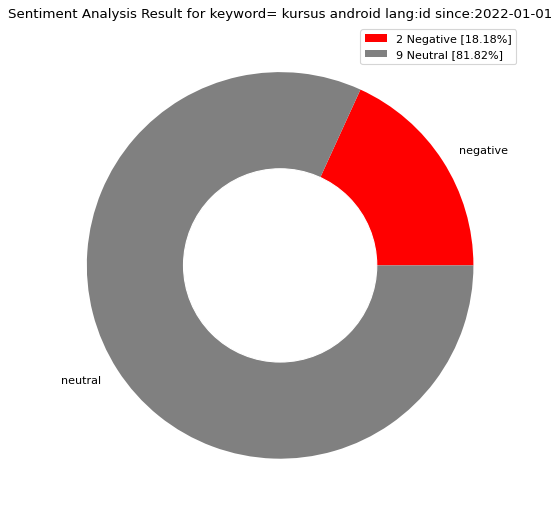

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart
#positive = pc['Percentage']['positive']
neutral = pc['Percentage']['neutral']
negative = pc['Percentage']['negative']
#pos = pc['Total']['positive']
neu = pc['Total']['neutral']
neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [str(neg)+' Negative ['+str(negative)+'%]',
          #str(pos)+' Positive ['+str(positive)+'%]' ,
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['red','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()

# **android Course**

In [ ]:
# Jangan di run lagi, soalnya lumayan lama. dataset hasil scraping dah ku save bentuk csv. nanti tinggal pake csv itu buat sentiment analysis

query = "android course lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_androidcourse.csv')

In [ ]:
url='https://drive.google.com/file/d/1TTO6kpEB4UeRsurf0VZOuMkPbBDnCqg2/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "android course lang:id since:2022-01-01"

Androidcourse = pd.read_csv(file_name)
Androidcourse.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-04-19 06:11:10+00:00,haqqi,"Case-nya 3 harian lalu beli course, diskon jad..."
1,1,2022-04-10 05:39:12+00:00,qtiejaem,ini kalo dibuatin series enhypen &amp; treasur...
2,2,2022-04-08 13:28:12+00:00,codingfess,code; ada saran course belajar android dev? tr...
3,3,2022-04-04 02:06:28+00:00,dicoding,🔔COURSE LAUNCHING🔔\n\nSpesial untukmu yang ing...
4,4,2022-04-01 13:38:49+00:00,FaizaSulaman,"Dekat 10 tahun pakai android, bila kena pegang..."


In [ ]:
Androidcourse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  17 non-null     int64 
 1   Date        17 non-null     object
 2   User        17 non-null     object
 3   Tweet       17 non-null     object
dtypes: int64(1), object(3)
memory usage: 672.0+ bytes


In [ ]:
tw_list = Androidcourse

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text
0,0,2022-04-19 06:11:10+00:00,haqqi,"case-nya 3 harian lalu beli course, diskon jad...","Case-nya 3 harian lalu beli course, diskon jad..."
1,1,2022-04-10 05:39:12+00:00,qtiejaem,ini kalo dibuatin series enhypen &amp; treasur...,ini kalo dibuatin series enhypen &amp; treasur...
2,2,2022-04-08 13:28:12+00:00,codingfess,code; ada saran course belajar android dev? tr...,code; ada saran course belajar android dev? tr...
3,3,2022-04-04 02:06:28+00:00,dicoding,🔔course launching🔔\n\nspesial untukmu yang ing...,🔔COURSE LAUNCHING🔔\n\nSpesial untukmu yang ing...
4,4,2022-04-01 13:38:49+00:00,FaizaSulaman,"dekat 10 tahun pakai android, bila kena pegang...","Dekat 10 tahun pakai android, bila kena pegang..."


In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
tw_list.head(10)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-19 06:11:10+00:00,haqqi,"case-nya 3 harian lalu beli course, diskon jad...",0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,2022-04-10 05:39:12+00:00,qtiejaem,ini kalo dibuatin series enhypen &amp; treasur...,0.500000,0.400000,positive,0.000,0.923,0.077,0.3595
2,2022-04-08 13:28:12+00:00,codingfess,code; ada saran course belajar android dev? tr...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,2022-04-04 02:06:28+00:00,dicoding,🔔course launching🔔\n\nspesial untukmu yang ing...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,2022-04-01 13:38:49+00:00,FaizaSulaman,"dekat 10 tahun pakai android, bila kena pegang...",0.066667,0.341667,positive,0.000,0.917,0.083,0.5574
5,2022-03-23 06:34:04+00:00,Jokitugsfess,joktug! \n\nopen jasa joki\n💰sd-kuliah\n\nopen...,0.000000,0.500000,positive,0.000,0.895,0.105,0.5983
6,2022-03-18 18:40:30+00:00,android_1os,wasanii hawajasoma ata computer course😂 nchi ...,0.000000,0.000000,positive,0.000,0.833,0.167,0.3400
7,2022-03-13 15:08:33+00:00,husinassegafff,aplikasi android pertama yang berhasil dibuat😅...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,2022-03-05 05:40:19+00:00,naufalpodolski,baru tukar minggu lepas setelah bertahun stic...,0.116667,0.666667,positive,0.046,0.884,0.069,0.2716
9,2022-03-05 05:39:34+00:00,IncheFaris,mula mula takut nak hijrah dari android ke io...,0.358333,0.433333,positive,0.000,0.888,0.112,0.5994


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
1,2022-04-10 05:39:12+00:00,qtiejaem,ini kalo dibuatin series enhypen &amp; treasur...,0.500000,0.400000,positive,0.0,0.923,0.077,0.3595
4,2022-04-01 13:38:49+00:00,FaizaSulaman,"dekat 10 tahun pakai android, bila kena pegang...",0.066667,0.341667,positive,0.0,0.917,0.083,0.5574
5,2022-03-23 06:34:04+00:00,Jokitugsfess,joktug! \n\nopen jasa joki\n💰sd-kuliah\n\nopen...,0.000000,0.500000,positive,0.0,0.895,0.105,0.5983


In [ ]:
tw_list_negative.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound


In [ ]:
tw_list_neutral.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-19 06:11:10+00:00,haqqi,"case-nya 3 harian lalu beli course, diskon jad...",0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,2022-04-08 13:28:12+00:00,codingfess,code; ada saran course belajar android dev? tr...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
3,2022-04-04 02:06:28+00:00,dicoding,🔔course launching🔔\n\nspesial untukmu yang ing...,0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
positive,7,41.18
neutral,10,58.82


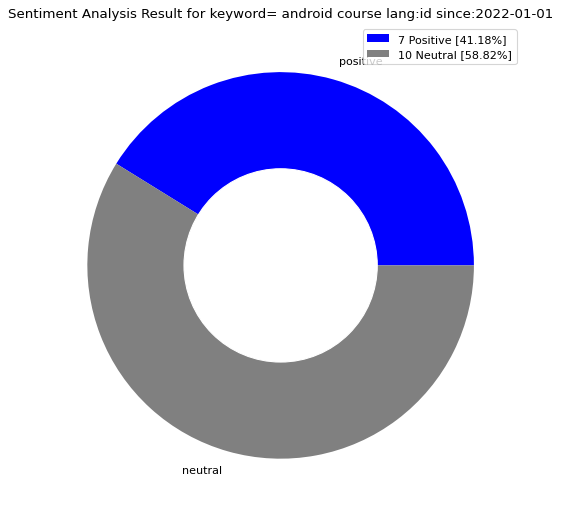

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart
positive = pc['Percentage']['positive']
neutral = pc['Percentage']['neutral']
#negative = pc['Percentage']['negative']
pos = pc['Total']['positive']
neu = pc['Total']['neutral']
#neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [#str(neg)+' Negative ['+str(negative)+'%]',
          str(pos)+' Positive ['+str(positive)+'%]' ,
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['blue','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()

# **Bootcamp Android**

In [ ]:
# Jangan di run lagi, soalnya lumayan lama. dataset hasil scraping dah ku save bentuk csv. nanti tinggal pake csv itu buat sentiment analysis

query = "bootcamp android lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_bootcampandroid.csv')

In [ ]:
url='https://drive.google.com/file/d/1zkcNDmd42De0eoG6PEL_lg373ksGlPx7/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "bootcamp android lang:id since:2022-01-01"

bootcampAndroid = pd.read_csv(file_name)
bootcampAndroid.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-04-10 20:25:41+00:00,anisa1_dwi,Info bootcamp / trainingcamp / private mentor ...
1,1,2022-04-10 15:33:48+00:00,budaksuwung,Info bootcamp/trainingcamp/private mentor prog...
2,2,2022-02-22 15:15:01+00:00,deenoo_o,@tetehslalusalah Maap maap aja nihh beberapa b...
3,3,2022-01-15 10:36:34+00:00,argahutama,@ardityawahyu @ezash Gw minimal cari fresher y...
4,4,2022-01-09 00:56:03+00:00,isalzufari,"Akhirnya daftar lah ke bootcamp, gratis juga. ..."


In [ ]:
bootcampAndroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5 non-null      int64 
 1   Date        5 non-null      object
 2   User        5 non-null      object
 3   Tweet       5 non-null      object
dtypes: int64(1), object(3)
memory usage: 288.0+ bytes


In [ ]:
tw_list = bootcampAndroid

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text
0,0,2022-04-10 20:25:41+00:00,anisa1_dwi,info bootcamp / trainingcamp / private mentor ...,Info bootcamp / trainingcamp / private mentor ...
1,1,2022-04-10 15:33:48+00:00,budaksuwung,info bootcamp/trainingcamp/private mentor prog...,Info bootcamp/trainingcamp/private mentor prog...
2,2,2022-02-22 15:15:01+00:00,deenoo_o,maap maap aja nihh beberapa bulan kebelakang ...,@tetehslalusalah Maap maap aja nihh beberapa b...
3,3,2022-01-15 10:36:34+00:00,argahutama,gw minimal cari fresher yg pernah ikut bootc...,@ardityawahyu @ezash Gw minimal cari fresher y...
4,4,2022-01-09 00:56:03+00:00,isalzufari,"akhirnya daftar lah ke bootcamp, gratis juga. ...","Akhirnya daftar lah ke bootcamp, gratis juga. ..."


In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
tw_list.head(10)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-10 20:25:41+00:00,anisa1_dwi,info bootcamp / trainingcamp / private mentor ...,0.000000,0.375000,neutral,0.000,1.000,0.000,0.0000
1,2022-04-10 15:33:48+00:00,budaksuwung,info bootcamp/trainingcamp/private mentor prog...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,2022-02-22 15:15:01+00:00,deenoo_o,maap maap aja nihh beberapa bulan kebelakang ...,0.350000,0.550000,neutral,0.000,1.000,0.000,0.0000
3,2022-01-15 10:36:34+00:00,argahutama,gw minimal cari fresher yg pernah ikut bootc...,-0.066667,0.433333,positive,0.000,0.918,0.082,0.1531
4,2022-01-09 00:56:03+00:00,isalzufari,"akhirnya daftar lah ke bootcamp, gratis juga. ...",0.000000,0.000000,negative,0.049,0.926,0.025,-0.2960


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
3,2022-01-15 10:36:34+00:00,argahutama,gw minimal cari fresher yg pernah ikut bootc...,-0.066667,0.433333,positive,0.0,0.918,0.082,0.1531


In [ ]:
tw_list_negative.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
4,2022-01-09 00:56:03+00:00,isalzufari,"akhirnya daftar lah ke bootcamp, gratis juga. ...",0.0,0.0,negative,0.049,0.926,0.025,-0.296


In [ ]:
tw_list_neutral.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-10 20:25:41+00:00,anisa1_dwi,info bootcamp / trainingcamp / private mentor ...,0.00,0.375,neutral,0.0,1.0,0.0,0.0
1,2022-04-10 15:33:48+00:00,budaksuwung,info bootcamp/trainingcamp/private mentor prog...,0.00,0.000,neutral,0.0,1.0,0.0,0.0
2,2022-02-22 15:15:01+00:00,deenoo_o,maap maap aja nihh beberapa bulan kebelakang ...,0.35,0.550,neutral,0.0,1.0,0.0,0.0


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
positive,1,20.0
negative,1,20.0
neutral,3,60.0


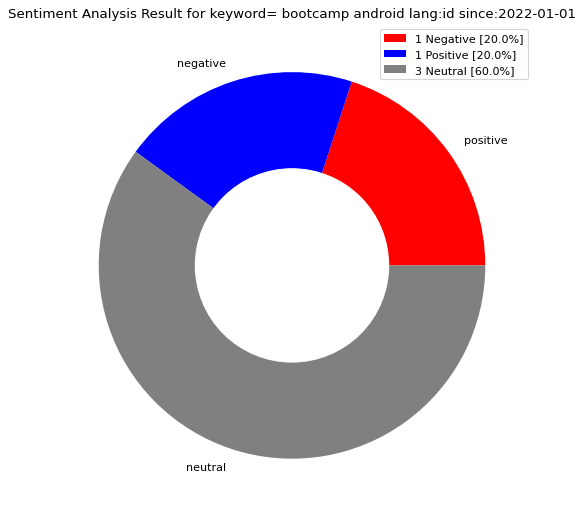

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart
positive = pc['Percentage']['positive']
neutral = pc['Percentage']['neutral']
negative = pc['Percentage']['negative']
pos = pc['Total']['positive']
neu = pc['Total']['neutral']
neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [str(neg)+' Negative ['+str(negative)+'%]',
          str(pos)+' Positive ['+str(positive)+'%]' ,
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['red','blue','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()

# **Training Android**

In [ ]:
# Jangan di run lagi, soalnya lumayan lama. dataset hasil scraping dah ku save bentuk csv. nanti tinggal pake csv itu buat sentiment analysis

query = "training android lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_trainingandroid.csv')

In [ ]:
url='https://drive.google.com/file/d/1MK7IYjwI3ab9sks7pVpd5CbQgABMrfPN/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "training android lang:id since:2022-01-01"

trainingAndroid = pd.read_csv(file_name)
trainingAndroid.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-04-19 07:14:45+00:00,one1000x,"Belajar Bermain Knives Out (Android, iOS) di M..."
1,1,2022-04-16 12:44:16+00:00,RosaSyapriadi,@YogaswaraWahyu @Pemandu_Bakat Seminggu ini fu...
2,2,2022-04-09 03:09:41+00:00,nuansa_global,Apa sih Kotlin itu dan kenapa kalian harus pel...
3,3,2022-04-08 21:37:10+00:00,ririesta,@bima_marzuki @ditjen_imigrasi Teringat temen2...
4,4,2022-03-21 16:15:23+00:00,_f_ja_,@sanawira Aku cuma sekali bgt pake Yandex pas ...


In [ ]:
trainingAndroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  13 non-null     int64 
 1   Date        13 non-null     object
 2   User        13 non-null     object
 3   Tweet       13 non-null     object
dtypes: int64(1), object(3)
memory usage: 544.0+ bytes


In [ ]:
tw_list = trainingAndroid

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text
0,0,2022-04-19 07:14:45+00:00,one1000x,"belajar bermain knives out (android, ios) di m...","Belajar Bermain Knives Out (Android, iOS) di M..."
1,1,2022-04-16 12:44:16+00:00,RosaSyapriadi,seminggu ini full seminar dan training full ...,@YogaswaraWahyu @Pemandu_Bakat Seminggu ini fu...
2,2,2022-04-09 03:09:41+00:00,nuansa_global,apa sih kotlin itu dan kenapa kalian harus pel...,Apa sih Kotlin itu dan kenapa kalian harus pel...
3,3,2022-04-08 21:37:10+00:00,ririesta,teringat temen2 gue yg paspornya abis pdhl s...,@bima_marzuki @ditjen_imigrasi Teringat temen2...
4,4,2022-03-21 16:15:23+00:00,_f_ja_,aku cuma sekali bgt pake yandex pas training ...,@sanawira Aku cuma sekali bgt pake Yandex pas ...


In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
tw_list.head(10)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-19 07:14:45+00:00,one1000x,"belajar bermain knives out (android, ios) di m...",0.00,0.00,neutral,0.000,1.000,0.000,0.0000
1,2022-04-16 12:44:16+00:00,RosaSyapriadi,seminggu ini full seminar dan training full ...,0.35,0.55,neutral,0.000,1.000,0.000,0.0000
2,2022-04-09 03:09:41+00:00,nuansa_global,apa sih kotlin itu dan kenapa kalian harus pel...,0.00,0.00,neutral,0.000,1.000,0.000,0.0000
3,2022-04-08 21:37:10+00:00,ririesta,teringat temen2 gue yg paspornya abis pdhl s...,-0.30,0.60,neutral,0.000,1.000,0.000,0.0000
4,2022-03-21 16:15:23+00:00,_f_ja_,aku cuma sekali bgt pake yandex pas training ...,0.00,0.00,negative,0.057,0.943,0.000,-0.2732
5,2022-02-27 14:25:53+00:00,jack____ruby,"ane mau share gan, google training + certifica...",0.00,0.00,positive,0.000,0.936,0.064,0.2960
6,2022-02-22 09:18:06+00:00,dicoding,sebagai google developers authorized training ...,0.00,0.00,neutral,0.000,1.000,0.000,0.0000
7,2022-02-21 05:05:41+00:00,dicoding,"⚠️ selain up to date, seorang android dev juga...",0.00,0.00,neutral,0.000,1.000,0.000,0.0000
8,2022-02-19 08:26:23+00:00,dicoding,pelajari implementasi komponen dasar aplikasi ...,0.00,0.00,neutral,0.000,1.000,0.000,0.0000
9,2022-02-15 22:05:19+00:00,jeejizeezi,gue kuliah cuma bikin model ai yang memungkink...,0.00,0.00,neutral,0.000,1.000,0.000,0.0000


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
5,2022-02-27 14:25:53+00:00,jack____ruby,"ane mau share gan, google training + certifica...",0.0,0.0,positive,0.0,0.936,0.064,0.2960
12,2022-01-10 09:27:01+00:00,onnowpurbo,insya allah bulan februari 2022 itts akan kerj...,0.4,0.8,positive,0.0,0.909,0.091,0.5106


In [ ]:
tw_list_negative.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
4,2022-03-21 16:15:23+00:00,_f_ja_,aku cuma sekali bgt pake yandex pas training ...,0.0,0.0,negative,0.057,0.943,0.0,-0.2732


In [ ]:
tw_list_neutral.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-19 07:14:45+00:00,one1000x,"belajar bermain knives out (android, ios) di m...",0.00,0.00,neutral,0.0,1.0,0.0,0.0
1,2022-04-16 12:44:16+00:00,RosaSyapriadi,seminggu ini full seminar dan training full ...,0.35,0.55,neutral,0.0,1.0,0.0,0.0
2,2022-04-09 03:09:41+00:00,nuansa_global,apa sih kotlin itu dan kenapa kalian harus pel...,0.00,0.00,neutral,0.0,1.0,0.0,0.0


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
negative,1,7.69
positive,2,15.38
neutral,10,76.92


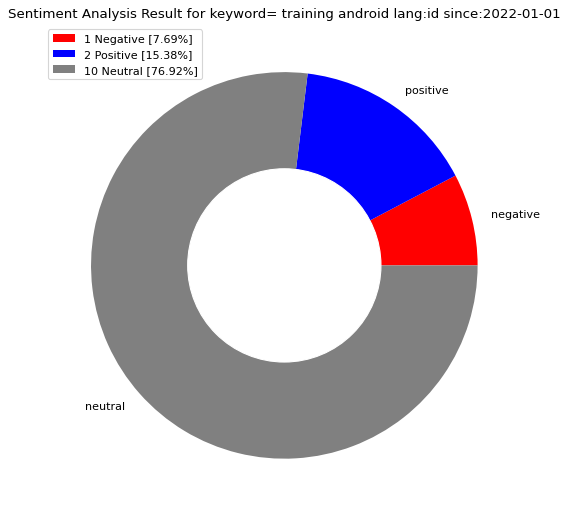

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart
positive = pc['Percentage']['positive']
neutral = pc['Percentage']['neutral']
negative = pc['Percentage']['negative']

pos = pc['Total']['positive']
neu = pc['Total']['neutral']
neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [str(neg)+' Negative ['+str(negative)+'%]',
          str(pos)+' Positive ['+str(positive)+'%]',
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['red', 'blue','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()

# **Kelas Android**

In [ ]:
# Jangan di run lagi, soalnya lumayan lama. dataset hasil scraping dah ku save bentuk csv. nanti tinggal pake csv itu buat sentiment analysis

query = "kelas android lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_kelasandroid.csv')

In [ ]:
url='https://drive.google.com/file/d/1rViZFX5lKV-0tSwfa_CRz2xesuY8oAOh/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "kelas android lang:id since:2022-01-01"

kelasAndroid = pd.read_csv(file_name)
kelasAndroid.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-04-19 14:36:39+00:00,undipmenfess,-dips! ada yang punya rekomendasi handphone an...
1,1,2022-04-19 12:06:47+00:00,chw_vnda,"Terus masih di kelas 5 SD, beberapa temen gue ..."
2,2,2022-04-19 08:10:56+00:00,telvrdadar,"Terus gue tanya, ""ini kelas android nya code m..."
3,3,2022-04-19 03:34:47+00:00,MtsPekan,"Senin, 18 April 2022\n\nGallery MTs Pekan Tebi..."
4,4,2022-04-19 03:34:26+00:00,MtsPekan,"Senin, 18 April 2022\n\nGallery MTs Pekan Tebi..."


In [ ]:
kelasAndroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  313 non-null    int64 
 1   Date        313 non-null    object
 2   User        313 non-null    object
 3   Tweet       313 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.9+ KB


In [ ]:
tw_list = kelasAndroid

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text
0,0,2022-04-19 14:36:39+00:00,undipmenfess,-dips! ada yang punya rekomendasi handphone an...,-dips! ada yang punya rekomendasi handphone an...
1,1,2022-04-19 12:06:47+00:00,chw_vnda,"terus masih di kelas 5 sd, beberapa temen gue ...","Terus masih di kelas 5 SD, beberapa temen gue ..."
2,2,2022-04-19 08:10:56+00:00,telvrdadar,"terus gue tanya, ""ini kelas android nya code m...","Terus gue tanya, ""ini kelas android nya code m..."
3,3,2022-04-19 03:34:47+00:00,MtsPekan,"senin, 18 april 2022\n\ngallery mts pekan tebi...","Senin, 18 April 2022\n\nGallery MTs Pekan Tebi..."
4,4,2022-04-19 03:34:26+00:00,MtsPekan,"senin, 18 april 2022\n\ngallery mts pekan tebi...","Senin, 18 April 2022\n\nGallery MTs Pekan Tebi..."


In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
tw_list.head(10)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-19 14:36:39+00:00,undipmenfess,-dips! ada yang punya rekomendasi handphone an...,0.00,0.00,neutral,0.0,1.000,0.000,0.0000
1,2022-04-19 12:06:47+00:00,chw_vnda,"terus masih di kelas 5 sd, beberapa temen gue ...",0.00,0.00,neutral,0.0,1.000,0.000,0.0000
2,2022-04-19 08:10:56+00:00,telvrdadar,"terus gue tanya, ""ini kelas android nya code m...",0.00,0.00,neutral,0.0,1.000,0.000,0.0000
3,2022-04-19 03:34:47+00:00,MtsPekan,"senin, 18 april 2022\n\ngallery mts pekan tebi...",0.00,0.00,neutral,0.0,1.000,0.000,0.0000
4,2022-04-19 03:34:26+00:00,MtsPekan,"senin, 18 april 2022\n\ngallery mts pekan tebi...",0.00,0.00,neutral,0.0,1.000,0.000,0.0000
5,2022-04-18 04:22:39+00:00,1havi1,iy enak ngk ada apa2 cuma software bawaan g...,0.00,0.00,neutral,0.0,1.000,0.000,0.0000
6,2022-04-18 03:09:23+00:00,hamadasatara,hp bekas orang tua haha abis itu barudahh esi...,-0.05,0.45,positive,0.0,0.939,0.061,0.4588
7,2022-04-18 02:51:02+00:00,inibabicantek,"android sih gini kak, gatau ios sama ga 😕\n\n...",0.00,0.00,neutral,0.0,1.000,0.000,0.0000
8,2022-04-18 01:03:24+00:00,tribunSUPERBALL,"tampil bagus pada moto2, kompatriot takaaki na...",0.00,0.00,neutral,0.0,1.000,0.000,0.0000
9,2022-04-18 01:03:20+00:00,BolaSportcom,"tampil bagus pada moto2, kompatriot takaaki na...",0.00,0.00,neutral,0.0,1.000,0.000,0.0000


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
6,2022-04-18 03:09:23+00:00,hamadasatara,hp bekas orang tua haha abis itu barudahh esi...,-0.05,0.450000,positive,0.000,0.939,0.061,0.4588
21,2022-04-13 00:53:09+00:00,asyrafoo,"sebab kenal android dulu. masa sekolah, cikgu ...",0.20,0.533333,positive,0.054,0.884,0.062,0.0865
29,2022-04-11 22:22:57+00:00,hamidieee,"for me, i just like android usage experience ...",0.50,0.500000,positive,0.000,0.793,0.207,0.7003


In [ ]:
tw_list_negative.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
15,2022-04-14 13:04:37+00:00,jestring_23,masih ingat buat akun itu dr android kelas ter...,-0.266667,0.766667,negative,0.119,0.881,0.0,-0.7351
30,2022-04-11 21:44:52+00:00,jumpandfeed,w tau sih ortu jg berperan. kali ini w nyalahi...,0.000000,0.000000,negative,0.031,0.969,0.0,-0.1027
92,2022-03-23 06:47:15+00:00,pandacondae,iya jaman sma ini jenis hp banyak banget karn...,0.000000,0.000000,negative,0.031,0.969,0.0,-0.0516


In [ ]:
tw_list_neutral.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-19 14:36:39+00:00,undipmenfess,-dips! ada yang punya rekomendasi handphone an...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,2022-04-19 12:06:47+00:00,chw_vnda,"terus masih di kelas 5 sd, beberapa temen gue ...",0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,2022-04-19 08:10:56+00:00,telvrdadar,"terus gue tanya, ""ini kelas android nya code m...",0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
negative,13,4.15
positive,42,13.42
neutral,258,82.43


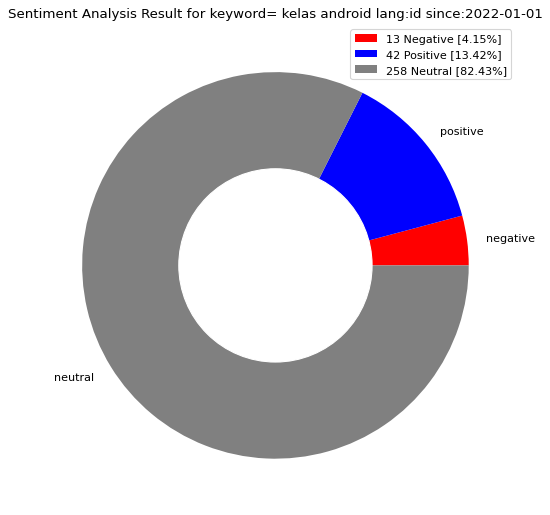

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart
positive = pc['Percentage']['positive']
neutral = pc['Percentage']['neutral']
negative = pc['Percentage']['negative']
pos = pc['Total']['positive']
neu = pc['Total']['neutral']
neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [str(neg)+' Negative ['+str(negative)+'%]',
          str(pos)+' Positive ['+str(positive)+'%]' ,
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['red','blue','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()

# **Les Android**

In [ ]:
# Jangan di run lagi, soalnya lumayan lama. dataset hasil scraping dah ku save bentuk csv. nanti tinggal pake csv itu buat sentiment analysis

query = "les android lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_lesandroid.csv')

In [ ]:
url='https://drive.google.com/file/d/1gHMG1forxvjp7rIPivaPHBUY30m8SuNZ/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "les android lang:id since:2022-01-01"

lesAndroid = pd.read_csv(file_name)
lesAndroid.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-03-20 06:10:24+00:00,tech_TD_,@LNo620 @rmxptfl @Esonyx Ptn\n\nLes emojis d'A...
1,1,2022-02-25 11:49:30+00:00,seralunar,@LoeveIy IH TP LUNA PAKE IPHONE. Mamahku pake ...
2,2,2022-02-20 16:42:03+00:00,DroidTrackr_fr,LesMobiles : Les 4 smartphones incontournables...
3,3,2022-02-15 01:14:18+00:00,BolaSportcom,PSG vs Real Madrid - Si Putih Digdaya atas Tim...
4,4,2022-02-15 01:14:15+00:00,tribunSUPERBALL,PSG vs Real Madrid - Si Putih Digdaya atas Tim...


In [ ]:
lesAndroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   Date        10 non-null     object
 2   User        10 non-null     object
 3   Tweet       10 non-null     object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


In [ ]:
tw_list = lesAndroid

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text
0,0,2022-03-20 06:10:24+00:00,tech_TD_,ptn\n\nles emojis d'android 11/12&gt;&gt;&g...,@LNo620 @rmxptfl @Esonyx Ptn\n\nLes emojis d'A...
1,1,2022-02-25 11:49:30+00:00,seralunar,"ih tp luna pake iphone. mamahku pake android,...",@LoeveIy IH TP LUNA PAKE IPHONE. Mamahku pake ...
2,2,2022-02-20 16:42:03+00:00,DroidTrackr_fr,lesmobiles : les 4 smartphones incontournables...,LesMobiles : Les 4 smartphones incontournables...
3,3,2022-02-15 01:14:18+00:00,BolaSportcom,psg vs real madrid - si putih digdaya atas tim...,PSG vs Real Madrid - Si Putih Digdaya atas Tim...
4,4,2022-02-15 01:14:15+00:00,tribunSUPERBALL,psg vs real madrid - si putih digdaya atas tim...,PSG vs Real Madrid - Si Putih Digdaya atas Tim...


In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
tw_list.head(10)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-03-20 06:10:24+00:00,tech_TD_,ptn\n\nles emojis d'android 11/12&gt;&gt;&g...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
1,2022-02-25 11:49:30+00:00,seralunar,"ih tp luna pake iphone. mamahku pake android,...",-1.0,1.0,negative,0.135,0.773,0.093,-0.2695
2,2022-02-20 16:42:03+00:00,DroidTrackr_fr,lesmobiles : les 4 smartphones incontournables...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
3,2022-02-15 01:14:18+00:00,BolaSportcom,psg vs real madrid - si putih digdaya atas tim...,0.2,0.3,neutral,0.000,1.000,0.000,0.0000
4,2022-02-15 01:14:15+00:00,tribunSUPERBALL,psg vs real madrid - si putih digdaya atas tim...,0.2,0.3,neutral,0.000,1.000,0.000,0.0000
5,2022-02-15 01:14:08+00:00,bolasportdotcom,psg vs real madrid - si putih digdaya atas tim...,0.2,0.3,neutral,0.000,1.000,0.000,0.0000
6,2022-02-13 06:19:35+00:00,G_mboto,sasa android tv ndio nini,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
7,2022-02-05 17:32:08+00:00,les_wwkwk,masih nongkrong diperempatan sambil gitaran. ...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
8,2022-01-04 04:19:09+00:00,WideKato,klo di jatinangor ada lembaga les bhs inggris...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
9,2022-01-03 16:18:09+00:00,_hamza_002,"kun kan 3ndk an android, at9dri tchufi les ms...",0.0,0.0,neutral,0.000,1.000,0.000,0.0000


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound


In [ ]:
tw_list_negative.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
1,2022-02-25 11:49:30+00:00,seralunar,"ih tp luna pake iphone. mamahku pake android,...",-1.0,1.0,negative,0.135,0.773,0.093,-0.2695


In [ ]:
tw_list_neutral.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-03-20 06:10:24+00:00,tech_TD_,ptn\n\nles emojis d'android 11/12&gt;&gt;&g...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,2022-02-20 16:42:03+00:00,DroidTrackr_fr,lesmobiles : les 4 smartphones incontournables...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
3,2022-02-15 01:14:18+00:00,BolaSportcom,psg vs real madrid - si putih digdaya atas tim...,0.2,0.3,neutral,0.0,1.0,0.0,0.0


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
negative,1,10.0
neutral,9,90.0


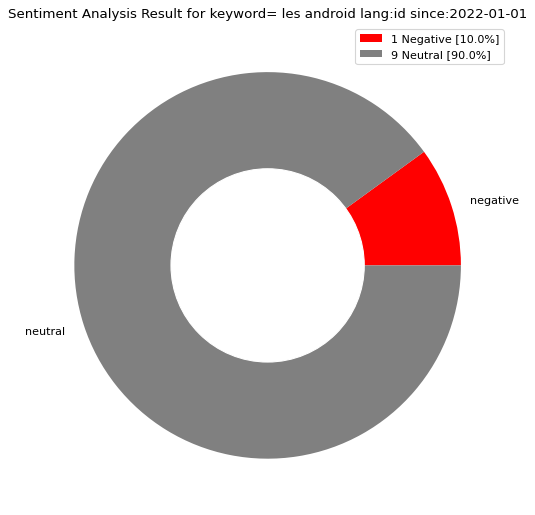

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart

neutral = pc['Percentage']['neutral']
negative = pc['Percentage']['negative']

neu = pc['Total']['neutral']
neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [str(neg)+' Negative ['+str(negative)+'%]',
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['red','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()

# **Pelatihan Android**

In [ ]:
# Jangan di run lagi, soalnya lumayan lama. dataset hasil scraping dah ku save bentuk csv. nanti tinggal pake csv itu buat sentiment analysis

query = "pelatihan android lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_pelatihanandroid.csv')

In [ ]:
url='https://drive.google.com/file/d/19y3HGl1YghPulTlRT6UNAcIAvlohTl9Q/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "pelatihan android lang:id since:2022-01-01"

pelatihanAndroid = pd.read_csv(file_name)
pelatihanAndroid.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-04-17 09:55:03+00:00,Harian_Jogja,Dosen UMY Beri Pelatihan Komunikasi Terapeutik...
1,1,2022-04-10 15:18:55+00:00,DTS_kominfo,"Digiers, kamu mau memperdalam kemampuan di bid..."
2,2,2022-04-08 04:18:56+00:00,dicoding,Program ini gratis dan ada dua pilihan pelatih...
3,3,2022-04-06 03:12:01+00:00,AaEzha,Beberapa pelatihan yang terbuka sampai saat in...
4,4,2022-04-04 05:31:24+00:00,Oranyeu,Today otak dibagi 4:\n- pelatihan android\n- b...


In [ ]:
pelatihanAndroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  13 non-null     int64 
 1   Date        13 non-null     object
 2   User        13 non-null     object
 3   Tweet       13 non-null     object
dtypes: int64(1), object(3)
memory usage: 544.0+ bytes


In [ ]:
tw_list = pelatihanAndroid

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text
0,0,2022-04-17 09:55:03+00:00,Harian_Jogja,dosen umy beri pelatihan komunikasi terapeutik...,Dosen UMY Beri Pelatihan Komunikasi Terapeutik...
1,1,2022-04-10 15:18:55+00:00,DTS_kominfo,"digiers, kamu mau memperdalam kemampuan di bid...","Digiers, kamu mau memperdalam kemampuan di bid..."
2,2,2022-04-08 04:18:56+00:00,dicoding,program ini gratis dan ada dua pilihan pelatih...,Program ini gratis dan ada dua pilihan pelatih...
3,3,2022-04-06 03:12:01+00:00,AaEzha,beberapa pelatihan yang terbuka sampai saat in...,Beberapa pelatihan yang terbuka sampai saat in...
4,4,2022-04-04 05:31:24+00:00,Oranyeu,today otak dibagi 4:\n- pelatihan android\n- b...,Today otak dibagi 4:\n- pelatihan android\n- b...


In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
tw_list.head(10)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-17 09:55:03+00:00,Harian_Jogja,dosen umy beri pelatihan komunikasi terapeutik...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
1,2022-04-10 15:18:55+00:00,DTS_kominfo,"digiers, kamu mau memperdalam kemampuan di bid...",0.0,0.0,negative,0.052,0.948,0.000,-0.1759
2,2022-04-08 04:18:56+00:00,dicoding,program ini gratis dan ada dua pilihan pelatih...,0.0,0.0,positive,0.000,0.941,0.059,0.0516
3,2022-04-06 03:12:01+00:00,AaEzha,beberapa pelatihan yang terbuka sampai saat in...,0.0,0.0,positive,0.000,0.885,0.115,0.4588
4,2022-04-04 05:31:24+00:00,Oranyeu,today otak dibagi 4:\n- pelatihan android\n- b...,0.0,0.0,neutral,0.139,0.722,0.139,0.0000
5,2022-04-04 04:13:24+00:00,Oranyeu,si kocak udah pindah ecosystem ke apple terus ...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
6,2022-03-29 10:37:11+00:00,STUDILMU,5. bisa menyelesaikan pelatihan secara offline...,0.0,0.0,negative,0.083,0.917,0.000,-0.2500
7,2022-03-11 11:44:35+00:00,firmangrh,"buat yang mau belajar bikin app android, lagi ...",0.0,0.0,positive,0.000,0.954,0.046,0.0516
8,2022-02-11 07:05:11+00:00,GunRomli,platform merdeka mengajar! guru dapat mengakse...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
9,2022-01-29 10:50:38+00:00,Pijatjogja24J,"kok mau sih, ikut pelatihan security, kyknya ...",0.0,0.0,positive,0.000,0.821,0.179,0.3400


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
2,2022-04-08 04:18:56+00:00,dicoding,program ini gratis dan ada dua pilihan pelatih...,0.0,0.0,positive,0.0,0.941,0.059,0.0516
3,2022-04-06 03:12:01+00:00,AaEzha,beberapa pelatihan yang terbuka sampai saat in...,0.0,0.0,positive,0.0,0.885,0.115,0.4588
7,2022-03-11 11:44:35+00:00,firmangrh,"buat yang mau belajar bikin app android, lagi ...",0.0,0.0,positive,0.0,0.954,0.046,0.0516


In [ ]:
tw_list_negative.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
1,2022-04-10 15:18:55+00:00,DTS_kominfo,"digiers, kamu mau memperdalam kemampuan di bid...",0.0,0.0,negative,0.052,0.948,0.0,-0.1759
6,2022-03-29 10:37:11+00:00,STUDILMU,5. bisa menyelesaikan pelatihan secara offline...,0.0,0.0,negative,0.083,0.917,0.0,-0.2500


In [ ]:
tw_list_neutral.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-17 09:55:03+00:00,Harian_Jogja,dosen umy beri pelatihan komunikasi terapeutik...,0.0,0.0,neutral,0.000,1.000,0.000,0.0
4,2022-04-04 05:31:24+00:00,Oranyeu,today otak dibagi 4:\n- pelatihan android\n- b...,0.0,0.0,neutral,0.139,0.722,0.139,0.0
5,2022-04-04 04:13:24+00:00,Oranyeu,si kocak udah pindah ecosystem ke apple terus ...,0.0,0.0,neutral,0.000,1.000,0.000,0.0


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
negative,2,15.38
positive,4,30.77
neutral,7,53.85


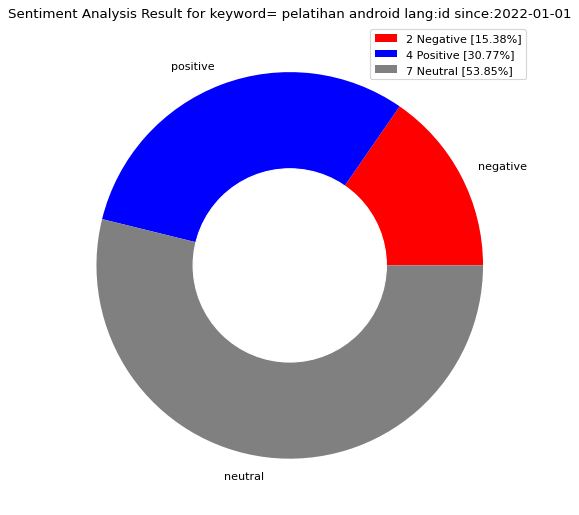

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart
positive = pc['Percentage']['positive']
neutral = pc['Percentage']['neutral']
negative = pc['Percentage']['negative']
pos = pc['Total']['positive']
neu = pc['Total']['neutral']
neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [str(neg)+' Negative ['+str(negative)+'%]',
          str(pos)+' Positive ['+str(positive)+'%]' ,
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['red','blue','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()

# **Belajar Android**

In [ ]:
# Jangan di run lagi, soalnya lumayan lama. dataset hasil scraping dah ku save bentuk csv. nanti tinggal pake csv itu buat sentiment analysis

query = "belajar android lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_belajarandroid.csv')

In [ ]:
url='https://drive.google.com/file/d/1GtVE9YPAdo76C1NYqo1iuh41U9mY7uH9/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "belajar android lang:id since:2022-01-01"

belajarAndroid = pd.read_csv(file_name)
belajarAndroid.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-04-19 11:37:16+00:00,ehanjis,@lveeknow bjirrr gue akan belajar cara menggun...
1,1,2022-04-19 09:16:13+00:00,nu_online,Ada rencana mudik? Baca doa ini saat singgah d...
2,2,2022-04-19 07:14:45+00:00,one1000x,"Belajar Bermain Knives Out (Android, iOS) di M..."
3,3,2022-04-19 04:24:41+00:00,triosukses,10 tahun yang lalu Penuh kenangan Bersama Reka...
4,4,2022-04-18 02:55:23+00:00,Rattlekraph,@collegemenfess Dari apa ya wkwwk belajar fram...


In [ ]:
belajarAndroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  463 non-null    int64 
 1   Date        463 non-null    object
 2   User        463 non-null    object
 3   Tweet       463 non-null    object
dtypes: int64(1), object(3)
memory usage: 14.6+ KB


In [ ]:
tw_list = belajarAndroid

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text
0,0,2022-04-19 11:37:16+00:00,ehanjis,bjirrr gue akan belajar cara menggunakan andr...,@lveeknow bjirrr gue akan belajar cara menggun...
1,1,2022-04-19 09:16:13+00:00,nu_online,ada rencana mudik? baca doa ini saat singgah d...,Ada rencana mudik? Baca doa ini saat singgah d...
2,2,2022-04-19 07:14:45+00:00,one1000x,"belajar bermain knives out (android, ios) di m...","Belajar Bermain Knives Out (Android, iOS) di M..."
3,3,2022-04-19 04:24:41+00:00,triosukses,10 tahun yang lalu penuh kenangan bersama reka...,10 tahun yang lalu Penuh kenangan Bersama Reka...
4,4,2022-04-18 02:55:23+00:00,Rattlekraph,dari apa ya wkwwk belajar framework buat biki...,@collegemenfess Dari apa ya wkwwk belajar fram...


In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
tw_list.head(10)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-19 11:37:16+00:00,ehanjis,bjirrr gue akan belajar cara menggunakan andr...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
1,2022-04-19 09:16:13+00:00,nu_online,ada rencana mudik? baca doa ini saat singgah d...,-0.75,1.0,negative,0.096,0.904,0.000,-0.5106
2,2022-04-19 07:14:45+00:00,one1000x,"belajar bermain knives out (android, ios) di m...",0.00,0.0,neutral,0.000,1.000,0.000,0.0000
3,2022-04-19 04:24:41+00:00,triosukses,10 tahun yang lalu penuh kenangan bersama reka...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
4,2022-04-18 02:55:23+00:00,Rattlekraph,dari apa ya wkwwk belajar framework buat biki...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
5,2022-04-18 01:04:44+00:00,karirpurwokerto,lowongan kerja ninja express terbaru\n\nrider ...,-0.10,0.6,neutral,0.000,1.000,0.000,0.0000
6,2022-04-17 12:23:46+00:00,hapidzf21,5 aplikasi terbaik untuk belajar bahasa korea ...,0.00,0.0,neutral,0.000,1.000,0.000,0.0000
7,2022-04-16 11:20:32+00:00,BeritasaatiniO,aplikasi belajar piano gratis untuk android pa...,0.00,0.0,positive,0.000,0.854,0.146,0.0516
8,2022-04-16 09:39:06+00:00,nu_online,yuk mengenal lebih dekat 7 faedah puasa ramadh...,-0.75,1.0,neutral,0.000,1.000,0.000,0.0000
9,2022-04-16 05:00:32+00:00,amoyssanf21,sy kelahiran 86 tapi masih dapat kapur tulis ...,0.00,0.0,negative,0.091,0.909,0.000,-0.3818


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
7,2022-04-16 11:20:32+00:00,BeritasaatiniO,aplikasi belajar piano gratis untuk android pa...,0.0,0.000000,positive,0.000,0.854,0.146,0.0516
19,2022-04-13 22:12:05+00:00,Armychristian2,"demo itu hak , bukan kewajiban . belajar dika...",0.2,0.300000,positive,0.000,0.784,0.216,0.7003
23,2022-04-13 00:53:09+00:00,asyrafoo,"sebab kenal android dulu. masa sekolah, cikgu ...",0.2,0.533333,positive,0.054,0.884,0.062,0.0865


In [ ]:
tw_list_negative.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
1,2022-04-19 09:16:13+00:00,nu_online,ada rencana mudik? baca doa ini saat singgah d...,-0.750000,1.000000,negative,0.096,0.904,0.0,-0.5106
9,2022-04-16 05:00:32+00:00,amoyssanf21,sy kelahiran 86 tapi masih dapat kapur tulis ...,0.000000,0.000000,negative,0.091,0.909,0.0,-0.3818
30,2022-04-11 06:21:15+00:00,Iwankristanto15,"kadrun baru netes toloool, baru belajar main t...",0.166667,0.333333,negative,0.095,0.905,0.0,-0.2732


In [ ]:
tw_list_neutral.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-19 11:37:16+00:00,ehanjis,bjirrr gue akan belajar cara menggunakan andr...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,2022-04-19 07:14:45+00:00,one1000x,"belajar bermain knives out (android, ios) di m...",0.0,0.0,neutral,0.0,1.0,0.0,0.0
3,2022-04-19 04:24:41+00:00,triosukses,10 tahun yang lalu penuh kenangan bersama reka...,0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
negative,45,9.72
positive,66,14.25
neutral,352,76.03


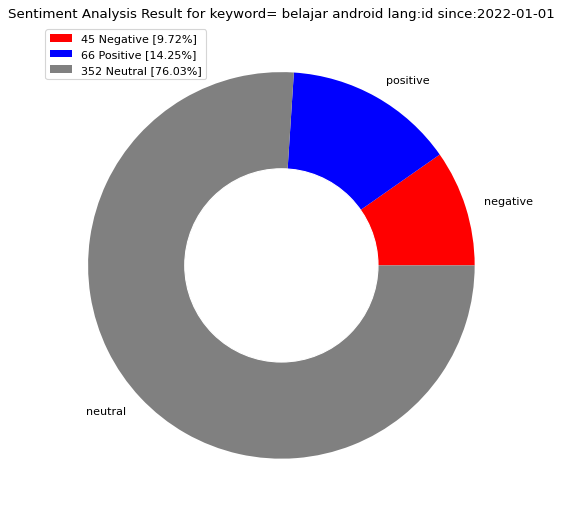

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart
positive = pc['Percentage']['positive']
neutral = pc['Percentage']['neutral']
negative = pc['Percentage']['negative']
pos = pc['Total']['positive']
neu = pc['Total']['neutral']
neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [str(neg)+' Negative ['+str(negative)+'%]',
          str(pos)+' Positive ['+str(positive)+'%]' ,
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['red','blue','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()